# Time Series Analysis and Modeling with the Air Passengers dataset. 

- This micro-project has the objective of predicting the number of air passengers in a Time Series based on a simple dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
base = pd.read_csv('data\AirPassengers.csv')
base.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


As we can see in the samples above, just the date and corresponding number of passengers compose the dataset. We can also note that the "Month" column is not in the correct data type. We need to transform these months into a date type and make them indexes.

In [4]:
from datetime import datetime

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], 
                    index_col='Month', date_parser = dateparse)
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
base.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
ts = base['#Passengers']
print('Min Index: ', ts.index.min())
print('\nMax Index: ', ts.index.max())

Min Index:  1949-01-01 00:00:00

Max Index:  1960-12-01 00:00:00


Let's plot the graph to see the passengers behavior through the time in the dataset.

C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


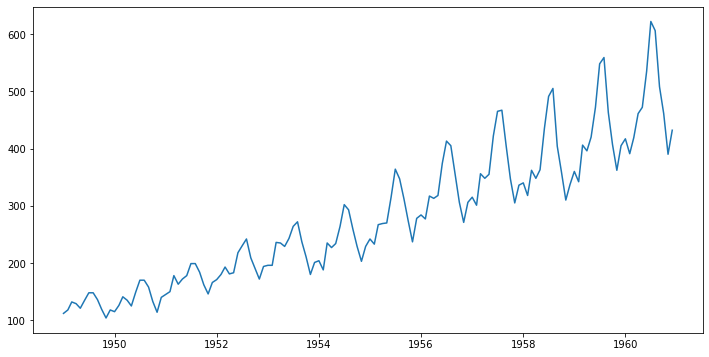

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ts)

We can identify some non-random patterns by the graph above:
- There is a growing trend in the number of passengers over the years;
- There is a regular succession of peaks and valleys. Probably, holidays, school vacation periods, or other factors associated with the seasons are responsible for this behavior.

To visualize more clearly, let's aggregate year and month separately in two graphs.

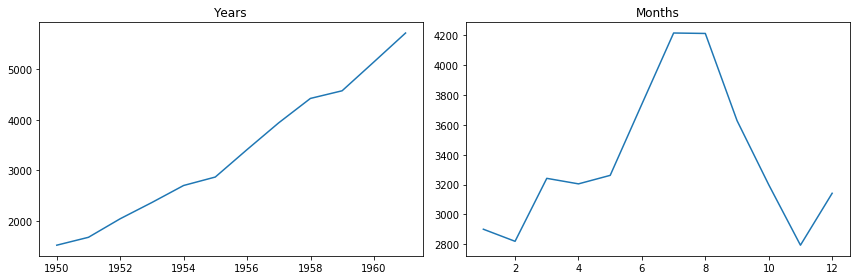

In [9]:
f = plt.figure(figsize=(12,4))
grid_spec = f.add_gridspec(1,2)

ax = f.add_subplot(grid_spec[0,0])
ts_year = ts.resample('A').sum()
plt.title('Years')
plt.plot(ts_year)

ax = f.add_subplot(grid_spec[0,1])
ts_month = ts.groupby([lambda x: x.month]).sum()
plt.title('Months')
plt.plot(ts_month)

f.tight_layout()

We can verify our hypothesis by plotting the tendency, seasonality, and irregular from the time series. The **tendency** describes the behavior of the variable portrayed in the time series over time. Its visualization is important to evaluate the data and use it in forecasting models. In turn, **seasonality** describes fluctuations in the variable values in periods of less than one year and which are repeated in all years, representing a possible pattern. Finally, the **irregular** are residuals or unexplained fluctuations that do not follow a pattern over time.

To visualize all these elements, is possible to decompose the time series with the methods below:

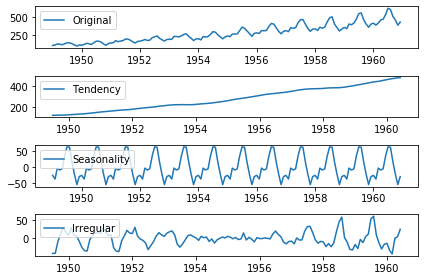

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(ts)
tendency = decompose.trend
seasonal = decompose.seasonal
irregular = decompose.resid

plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc='upper left')

plt.subplot(4,1,2)
plt.plot(tendency, label='Tendency')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(irregular, label='Irregular')
plt.legend(loc='upper left')
plt.tight_layout()


Although the "seasonal_decompose" method provides the trend automatically, there are many other mathematical procedures capable of calculates the trend line. Moving Averages is one of them, that calculates the averages according to a specific period. 

As this dataset has mensal information about the number of passengers, let's consider 12 months and generate the line trend graph.

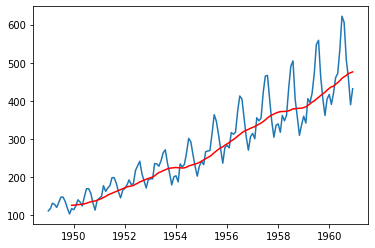

In [11]:
#tendency by moving average
ma = ts.rolling(window = 12).mean()
plt.plot(ts)
plt.plot(ma, color='red')

## Prediction Model

For the forecast task, we will utilize a model named **ARIMA**. ARIMA is an autoregressive integrated moving average model, capable of adjusting itself to time series data for future values prediction.

Is usually denoted as ARIMA(p, d, q), whose the parameters means:
- **p**: regressive model order;
- **d**: differentiation degree;
- **q**: order of the moving average model.

Usually, we can manually define the values for the p, d, and q parameters and testing to find the best combinations. However, we also can fit our model with a resource named **auto Arima**. This method can automatically discover the best parameters and build the ARIMA model.

In [12]:
from pmdarima import auto_arima

#n=12, to 12 months period
model_auto = auto_arima(ts, n=12, seasonal=True, trace=True)

#checking the model summary
model_auto.summary()

C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1344.044, BIC=1361.821, Fit time=1.359 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1415.278, BIC=1421.203, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1403.473, BIC=1412.361, Fit time=0.156 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1398.827, BIC=1407.716, Fit time=0.302 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1413.909, BIC=1416.872, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1371.827, BIC=1386.641, Fit time=0.536 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1361.693, BIC=1376.507, Fit time=0.891 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 1); setting score to inf (at least one

C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1360.747, BIC=1381.487, Fit time=1.720 seconds
Near non-invertible roots for order (3, 1, 2)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1372.181, BIC=1392.921, Fit time=1.549 seconds
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1396.121, BIC=1407.972, Fit time=0.432 seconds


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1373.078, BIC=1390.855, Fit time=1.313 seconds
Near non-invertible roots for order (1, 1, 3)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1362.462, BIC=1380.239, Fit time=0.718 seconds
Near non-invertible roots for order (3, 1, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1347.993, BIC=1371.696, Fit time=1.838 seconds
Near non-invertible roots for order (3, 1, 3)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 10.900 seconds


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Tue, 04 Aug 2020   AIC                           1344.044
Time:                        16:37:22   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6619      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.888      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.753      0.000      -0.958      -0.861
ma.L1         -1.9079      0.356     -5.358      0.000      -2.606      -1.210
ma.L2          0.9977      0.372      2.683      0.007       0.269       1.727
sigma2       611.7838    247.473      2.472      0.013     126.745    1096.823
===================================================================================
Ljung-Box (Q):                      358.19   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see in the output above, the auto Arima tried many combinations for the parameters. By plotting the model summary, in **Model: SARIMAX(2, 1, 2)**, is showed the best values.

By knowing these values, we can build the model manually with the code cell below.

In [13]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order=(2,1,2))
trained_model = model.fit()
trained_model.summary()

C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Tue, 04 Aug 2020   AIC                           1344.043
Time:                        16:37:49   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9099      0.065    -29.521      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.810      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

Following, we can use the trained model to predict the number of passengers for the next 12 months. 

In [14]:
predicts = trained_model.forecast(steps=12)[0]
print('Predicted number of passengers:\n', predicts)

Predicted number of passengers:
 [433.11609573 450.88271721 479.80446545 511.96481728 539.31705929
 555.80171954 558.75213511 549.28484979 531.66466354 511.9033869
 496.02840366 488.50403507]


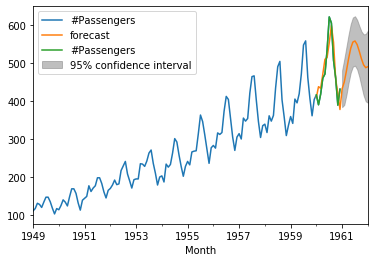

In [15]:
#graph
axis = ts.plot()
fig = trained_model.plot_predict('1960-01-01', '1962-01-01', ax = axis, plot_insample=True)
plt.show()

As we can see in the graph above, the orange line corresponds to the model forecast with a 95% confidence interval in the next 12 months. 